In [32]:
# Задание № 1 (Обязательно) Вам даны результаты проверки двух препаратов.
# Требуется:

# Оценить, есть ли различие в эффекте у этих пациентов?
# Визуально подтвердить результат
# A - результаты для группы людей получающих препарат А.

# B - результаты для другой группы людей, получающих препарат B

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)


In [2]:
from scipy.stats import mannwhitneyu

In [4]:
stat, p = mannwhitneyu(A, B) 
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.01  
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=4343.000, p=0.054
Одинаковые распределения (не отвергаем H0)


11.345546240764518 22.557496178167234


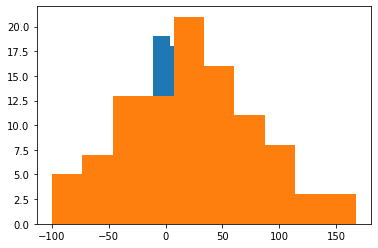

In [5]:
print(np.mean(A), np.mean(B))

plt.hist(A)
plt.hist(B);


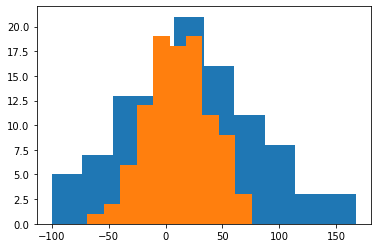

In [6]:
plt.hist(B)
plt.hist(A);

In [7]:
# Задание № 2 (Обязательно) Вам даны результаты проверки двух препаратов.
# Требуется:

# Оценить, есть ли различие в эффекте у этих пациентов?
# Визуально подтвердить результат
# А - группа людей без препарата.

# B - та же группа людей, но получающая препарат

In [8]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
from scipy.stats import wilcoxon
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.01
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Одинаковые распределения (не отвергаем H0)


<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [3]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

from scipy.stats import f_oneway
F, p = f_oneway(water, nutri, mineral)  

alpha = 0.01  
print(F, p)   
if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


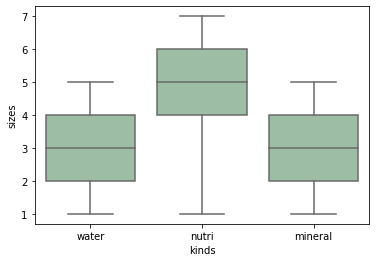

In [4]:
import seaborn as sns
 
#Немного преобразуем данные, не важно как
sizes = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()


In [5]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
# Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

# userid - уникальный номер, идентифицирующий каждого игрока.

# version - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

# sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

# retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

# retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

# Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

In [7]:
# Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
# Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
# Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. 
# Большим плюсом будет построение визуализиции для подтверждения ваших выводом. 
# Рекомендую использовать seaborn c его sns.boxplot/sns.carplot, sns.barplot, но можно обойтись и обычном matplotlib

In [8]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [9]:
gate_30= data.loc[data['version'] == 'gate_30']
gate_40= data.loc[data['version'] == 'gate_40'] 

In [10]:
#Кто больше теряет игороков?
gate_40f= gate_40[(gate_40['retention_1'] == False) & (gate_40['retention_1'] == False)].count()
gate_30f= gate_30[(gate_30['retention_1'] == False) & (gate_30['retention_1'] == False)].count()
print(gate_40f,gate_30f)

userid            25370
version           25370
sum_gamerounds    25370
retention_1       25370
retention_7       25370
dtype: int64 userid            24666
version           24666
sum_gamerounds    24666
retention_1       24666
retention_7       24666
dtype: int64


In [11]:
#Так как количество userid разное, то правильно смотреть процентное соотношение

In [12]:
gt30 = gate_30.groupby(['version','retention_1', 'retention_7']).count().transform(lambda x: x/np.sum(x)*100).sort_values(by='sum_gamerounds', ascending=False)
gt40 = gate_40.groupby(['version','retention_1', 'retention_7']).count().transform(lambda x: x/np.sum(x)*100).sort_values(by='sum_gamerounds', ascending=False)

In [13]:
allgate = pd.concat([gt30 ,gt40]).sort_values(by=['sum_gamerounds','retention_1','retention_7'], ascending=False)
allgate

userid  sum_gamerounds
version retention_1 retention_7                           
gate_40 False       False        51.874079       51.874079
gate_30 False       False        51.096197       51.096197
gate_40 True        False        29.925916       29.925916
gate_30 True        False        29.883669       29.883669
                    True         14.935123       14.935123
gate_40 True        True         14.302359       14.302359
gate_30 False       True          4.085011        4.085011
gate_40 False       True          3.897646        3.897646

In [14]:
#Вывод 1: gate_40 теряет чуть больше игроков (показатели False	False )
#Вывод 2: основной возврат идет на сл.день

(<matplotlib.axes._subplots.AxesSubplot at 0x183dd058be0>,
 Text(0.5, 1.0, 'Процентное сравнение игроков в зависимости от постановки ворот'))

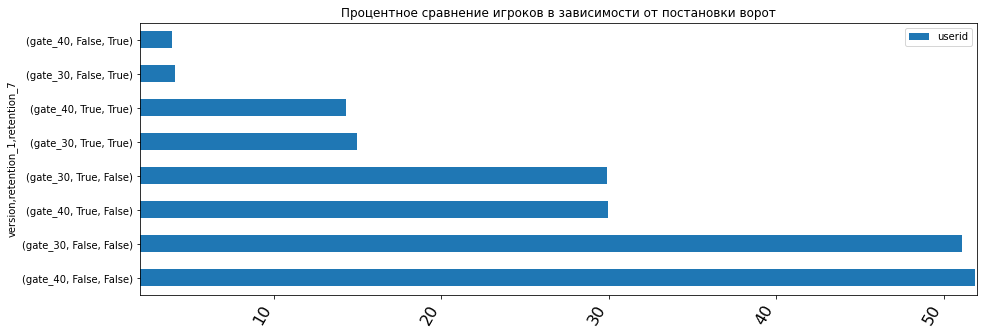

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
dftop = allgate[['userid']]
ax = dftop.plot(kind='barh', stacked=True),plt.title('Процентное сравнение игроков в зависимости от постановки ворот')
plt.xticks(rotation=60, horizontalalignment='right',fontsize=16)
plt.xlim(2, 52)
ax

In [19]:
# Описание набора данных
# Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

# pid: Numeric - ID покемона
# HP: Numeric - Очки здоровья
# Attack: Numeric - Сила обычной атаки
# Defense: Numeric - Сила обычной защиты
# Sp. Atk: Numeric - Сила специальной атаки
# Sp. Def: Numeric - Сила специальной защиты
# Speed: Numeric - Скорость движений
# Legendary: Boolean - «True», если покемон редкий
# Class 1: Categorical - Класс покемона
# Class 2: Categorical - Класс покемона

In [20]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [21]:
# Задание № 1 (Обязательно):
# Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, 
# чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.

# Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;

# Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [22]:
df = pokemon[['Class 1','Class 2', 'Attack']]

In [23]:
dfboth1  = df[(df['Class 1'] == 'Rock') & (df['Class 2'] == 'Grass')]
dfboth2  = df[(df['Class 1'] == 'Grass' ) & (df['Class 2'] == 'Rock')]
print(dfboth1)
print(dfboth2)

    Class 1 Class 2  Attack
377    Rock   Grass      41
378    Rock   Grass      81
Empty DataFrame
Columns: [Class 1, Class 2, Attack]
Index: []


In [24]:
df.drop(labels = [377,378],axis = 0)

,Class 1,Class 2,Attack
0,Grass,Poison,49
1,Grass,Poison,62
2,Grass,Poison,82
3,Grass,Poison,100
4,Fire,NaN,52
...,...,...,...
795,Rock,Fairy,100
796,Rock,Fairy,160
797,Psychic,Ghost,110
798,Psychic,Dark,160


In [25]:
Rock= df.loc[df['Class 1'] == 'Rock'] 
Rock2= df.loc[df['Class 2'] == 'Rock'] 

In [26]:
Grass = df.loc[df['Class 1'] == 'Grass'] 
Grass2 = df.loc[df['Class 2'] == 'Grass'] 

In [27]:
sravnenie = pd.concat([Grass, Rock], ignore_index=True)
sravnenie2 = pd.concat([Grass2, Rock2], ignore_index=True)

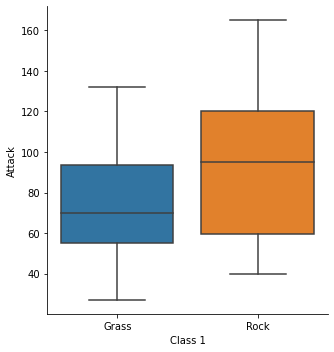

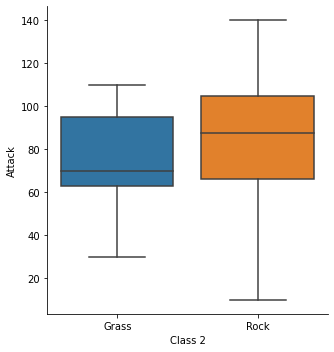

In [28]:
sns.catplot(x="Class 1", y="Attack",
            data=sravnenie, kind="box",
            height=5, aspect=.95);
sns.catplot(x="Class 2", y="Attack",
            data=sravnenie2, kind="box",
            height=5, aspect=.95);


In [29]:
#Вывод; Rock сильнее

In [30]:
# Задание № 2 (Обязательно):
# Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, 
# а правда, что покемоны что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal.

# Проверьте, прав ли он, и убедите его в своем выводе статистически.

# Примечание: если есть покемоны относятся к обоим классам, выбросьте их;

# Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [31]:
df2 = pokemon[['Class 1','Class 2', 'Speed']]

In [32]:
dfbothW  = df2[(df2['Class 1'] == 'Water') & (df2['Class 2'] == 'Normal')]
dfbothN  = df2[(df2['Class 1'] == 'Normal' ) & (df2['Class 2'] == 'Water')]
print(dfbothW)
print(dfbothN)

Empty DataFrame
Columns: [Class 1, Class 2, Speed]
Index: []
    Class 1 Class 2  Speed
445  Normal   Water     71


In [33]:
df2.drop(labels = [445],axis = 0)

,Class 1,Class 2,Speed
0,Grass,Poison,45
1,Grass,Poison,60
2,Grass,Poison,80
3,Grass,Poison,80
4,Fire,NaN,65
...,...,...,...
795,Rock,Fairy,50
796,Rock,Fairy,110
797,Psychic,Ghost,70
798,Psychic,Dark,80


In [34]:
Water= df.loc[df['Class 1'] == 'Water'] 
Water2= df.loc[df['Class 2'] == 'Water']
Normal = df.loc[df['Class 1'] == 'Normal'] 
Normal2 = df.loc[df['Class 2'] == 'Normal'] 

In [35]:
sravnenieNW = pd.concat([Water, Normal], ignore_index=True)
sravnenieNW2 = pd.concat([Water2, Normal2], ignore_index=True)

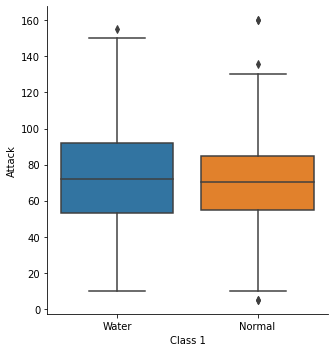

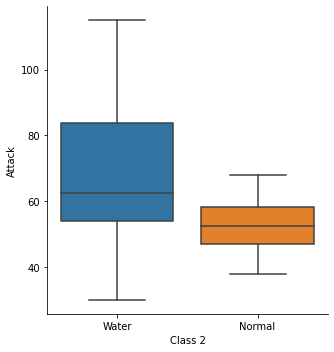

In [36]:
sns.catplot(x="Class 1", y="Attack",
            data=sravnenieNW, kind="box",
            height=5, aspect=.95);
sns.catplot(x="Class 2", y="Attack",
            data=sravnenieNW2, kind="box",
            height=5, aspect=.95);

In [37]:
#покемоны в классе Water в среднем более быстрые, профессор прав

In [42]:
# Задание № 3:
# Профессор Оук тот еще безумец. Он изобрел сыворотку, 
# способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. 
# Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. 
# Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

# Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [43]:
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [44]:
names = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
izbrannie = pokemon.loc[pokemon['Name'].isin(names)]
izbrannie

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [45]:
all_speed = pokemon[['Name', 'Speed']]
all_speed.drop(labels = [19,71,428,476],axis = 0)

,Name,Speed
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,Mega Venusaur,80
4,Charmander,65
...,...,...
795,Diancie,50
796,Mega Diancie,110
797,Hoopa Confined,70
798,Hoopa Unbound,80


(100.0, 200.0)

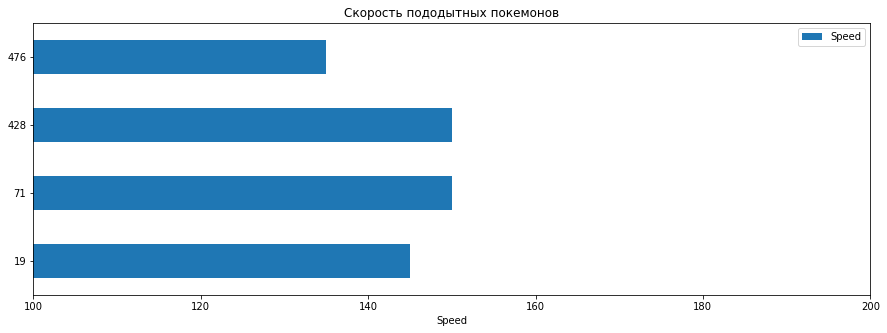

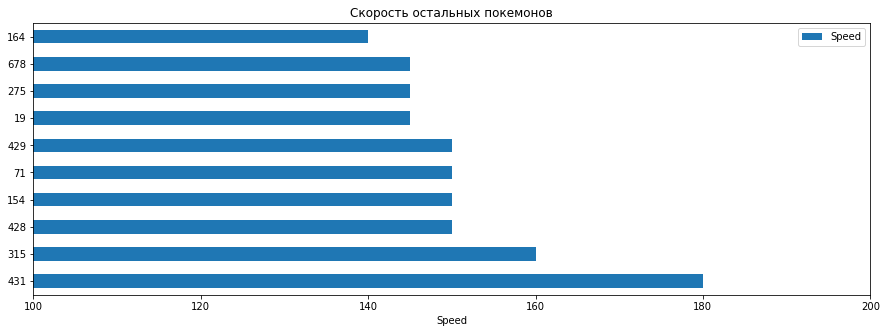

In [46]:
speed_izbrannih = izbrannie[['Name', 'Speed']]
ax = speed_izbrannih.plot(kind='barh'),plt.xlabel('Speed'),plt.title('Скорость пододытных покемонов')
plt.xlim(100, 200)
top_speed = all_speed.sort_values(by='Speed', ascending=False).head(10)
ax = top_speed.plot(kind='barh'),plt.xlabel('Speed'),plt.title('Скорость остальных покемонов')
plt.xlim(100, 200)

In [49]:
#Визуально, видно, что сыворотка не рабоотает, проверяем статистически
import scipy.stats as stats
t, p_value = stats.ttest_ind(speed_izbrannih['Speed'], top_speed['Speed'])
t, p_value
alpha = 0.01  
print(p_value)   
if p_value > alpha:
    print('Одинаковое распределение (Выборки не различаются между собой,сыворотка не работает)')
else:
    print('Разное распределение (принимаем альтернативную гипотезу - Выборки отличаются)')

0.31238667262691794
Одинаковое распределение (Выборки не различаются между собой,сыворотка не работает)
